# Introduction
The stock market is a complex and dynamic system that is influenced by various factors, including the market trends, company news, financial reports, and global economic conditions as well as sentiment of investors towards a company. With the increasing popularity of social media platforms, particularly Twitter, users share their opinions and views about companies and their products/services. Hence, there is a potential to leverage these sentiments to predict the future trends of the stock market. In this project, we aim to use sentiment analysis on Twitter data to predict the stock prices of Tesla Company, and we will employ the LSTM model for this prediction.

In [1]:
# import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Tweets Data

## Create Daily Time Interval

In [2]:
# Create day to day time frame
empty = []
day = 1
month = 1
year = 2020
while year < 2022:
    
    if month in [1,3,5,7,8,10,12]:
        
                start = f'{year}-{month}-{day}T00:00:00Z'
                if day == 31 and month != 12:
                    day = 1
                    month += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                elif day == 31 and month == 12:
                    day = 1
                    month = 1
                    year += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                elif day != 31:
                    day += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                    
                empty.append((start,end))
                
    elif month in [4,6,9,11]:
        
                start = f'{year}-{month}-{day}T00:00:00Z'
                if day == 30 and month != 12:
                    day = 1
                    month += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                elif day == 30 and month == 12:
                    day = 1
                    month = 1
                    year += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                elif day != 30:
                    day += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                    
                empty.append((start,end))
            
    else:
        if year != 2020:
                start = f'{year}-{month}-{day}T00:00:00Z'
                if day == 28 and month != 12:
                    day = 1
                    month += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                elif day == 28 and month == 12:
                    day = 1
                    month = 1
                    year += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                elif day != 28:
                    day += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                    
                empty.append((start,end))
            
        else:
                start = f'{year}-{month}-{day}T00:00:00Z'
                if day == 29 and month != 12:
                    day = 1
                    month += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                elif day == 29 and month == 12:
                    day = 1
                    month = 1
                    year += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                elif day != 29:
                    day += 1
                    end = f'{year}-{month}-{day}T00:00:00Z'
                    
                empty.append((start,end))
                
# save the daily instances into timeIntervals.csv
pd.DataFrame(np.array(empty)).to_csv('timeIntervals.csv')

## Initialize API Token and Keys
To maintain confidentiality, placeholder values are used in place of token credentials in this context.

In [ ]:
# Create API token and key
API_KEY = '*************qeab8'
API_KEY_SECRET = '****************XHNOgjgbFViAyX'
BEARER_TOKEN = '********************************************cHT8HnbWSxHKgKABYYzB0ZJW'
ACCESS_TOKEN = '**********************************9mt4foLI1wSWDR8ln'
ACCESS_TOKEN_KEY = '********************************kn7K6zomnr'
CLIENT_ID = '***************************Helg6MTpjaQ'
CLIENT_SECRET = '*************************************HQKIHWuDjIe-UxmB'

## Create a 'Client' Object Instance (Twitter API V2)

In [ ]:
# Create 'client' object instance
client = tweepy.Client(bearer_token=BEARER_TOKEN,
              consumer_key=API_KEY,
              consumer_secret=API_KEY_SECRET,
              access_token=ACCESS_TOKEN,
              access_token_secret=ACCESS_TOKEN_KEY)

In [ ]:
# Write a query to define a condition of tweets search
query = "#Tesla -is:retweet -has:media -has:links lang:en"

The defined query retrieves tweets that contain the hashtag #Tesla while ignoring retweets to avoid duplication. Additionally, only tweets in English are included, and any tweets that contain links or media (such as videos or images) are excluded.

## Extract Tweet ID

In [ ]:
# Get all tweets ID
import time

day = pd.read_csv('timeIntervals.csv')
day = np.array(day)

text = []
id_ = []
counter = 0
stop = 0
while counter <= 731:
    time.sleep(1)
    response = client.search_all_tweets(query, end_time=day[counter][2] ,start_time = day[counter][1],max_results = 500)
    
    for tweet in response.data:
        text.append(tweet.text)
        id_.append(tweet.id)
        
    counter += 1

In [ ]:
#Fech data from each day and save tweets ID and text into 'extract.cv'
pd.DataFrame({'id':id_, 'text':text}).to_csv('extract.csv')

## Extract Tweet Metrics
The metrics for tweets include the tweet's unique ID, the number of likes it has received, whether or not the post has been retweeted, and whether or not the post contains the coin tag $TSLA

In [ ]:
data = pd.read_csv('extract.csv')
ids = np.array(data['id'])

In [ ]:
# Extract tweet metrics from tweet's ID 
ID = []
created_at = []
like_count = []
retweet_count = []
author_id = []
text = []

counter =  0
save = 0

for id_ in ids:
    
    try:
        save += 1
        
        if counter < 299:
            counter += 1
            tweets_info = client.get_tweets(ids=id_, expansions="author_id", tweet_fields=["public_metrics","created_at", "author_id"])
            for info in tweets_info.data:
                ID.append(info["id"])
                created_at.append(info["created_at"])
                author_id.append(info["author_id"])
                like_count.append(info["public_metrics"]["like_count"])
                retweet_count.append(info["public_metrics"]["retweet_count"])
                text.append(info["text"])
        else:
            time.sleep(60*15)
            counter = 0
            
        if save == 1000:    
            pd.DataFrame({'ID': ID, 'created_at':created_at, 'like_count':like_count, 'retweet_count':retweet_count, 'author_id':author_id, 'text':text}).to_csv('tweetsData.csv')
            save = 0
            
    except TypeError:
        continue

## Extract User Metrics (Twitter API V1)
The author's metrics for a tweet consist of their user ID, the number of followers they have, and whether their account is verified or not. Additionally, it is important to note that the API V1 was utilized to request user metrics.

In [ ]:
# Extract user metrics
user_data = pd.read_csv('userID.csv')
id_ = np.array(user_data['user_id'])

In [ ]:
# Connect to twitter API
auth = tweepy.OAuthHandler(API_KEY, API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_KEY)

In [ ]:
user_ID = []
followers_count = []
verified = []

save = 0

for USER in id_[40000:]:
    try:
        api = tweepy.API(auth, wait_on_rate_limit= True)
        user = api.get_user(user_id = USER)

        user_ID.append(user.id)
        followers_count.append(user.followers_count)
        verified.append(user.verified)
        save += 1
        
        if save == 1000:
            pd.DataFrame({'user_id': user_ID, 'followers_count':followers_count, 'verified':verified}).to_csv('userData.csv')
            save = 0
            
    except:
        continue

## Read final tweets and user dataset after fetching data

In [21]:
td = pd.read_csv('tweetsData.csv')
td.drop(columns = 'Unnamed: 0', inplace = True)
td.sample(3)

,Tweet_id,Created_at,Like_count,Is_retweeted,User_id,Text,Has_$TSLA
8237,1230149809685831680,2020-02-19 15:19:04+00:00,1,False,3188092003,"@TeslaForThe_Win See? C'mon @ElonMusk, give th...",False
127724,1433137126913105922,2021-09-01 18:38:12+00:00,0,False,102725658,It is sad that @tesla stops communicating with...,False
106994,1407613324758372352,2021-06-23 08:15:43+00:00,0,False,1361356457988427776,@nayibbukele Stupid #Tesla had ruined the Cryp...,False


In [22]:
ud = pd.read_csv('userData.csv')
ud.drop(columns = 'Unnamed: 0', inplace = True)
ud.sample(3)

,User_id,Follower_count,Is_verified
55388,35165776,439,False
36902,18397098,544,False
61277,13033742,7719,False


## Join tweets and user metrics
The tweet and user datasets were merged based on the common attribute 'User_id'

In [23]:
df = pd.merge(td, ud, on=["User_id"])
df.sample(2)

,Tweet_id,Created_at,Like_count,Is_retweeted,User_id,Text,Has_$TSLA,Follower_count,Is_verified
14470,1369422936302628869,2021-03-09 23:00:45+00:00,0,False,958736994,There is a lot more to Tesla than the electric...,False,7830,False
107611,1376117393844473856,2021-03-28 10:22:08+00:00,0,False,1370413083693346824,Which Tesla do you like best? #Tesla #teslafan...,False,207,False


## Text Cleaning
Before conducting sentiment analysis on tweets, the tweet text needs to undergo preprocessing and preparation. Our implemented preprocessing methods include replacing emojis, removing punctuation, special characters, and stop words. Additionally, we also utilize lemmatization and stemming techniques to further refine the text.
### Replace Emojies

In [24]:
def replace_emojis(text):
    emoji_dict = {
        "😊": "smiling face with smiling eyes",
        "😠": "angry face",
        "😂": "face with tears of joy",
        "😍": "smiling face with heart-eyes",
        "😭": "loudly crying",
        "😡": "pouting face",
        "😎": "smiling",
        "😔": "pensive face",
        "❤️": "love",
        "😂": "joy",
        "😊": "happiness",
        "😢": "sadness",
        "😠": "anger",
        "😡": "anger",
        "😮": "surprise",
        "😐": "neutral",
        "😔": "disappointment",
        "😞": "disappointment",
        "😌": "relief",
        "😛": "teasing",
        "😜": "teasing"
    }
    
    for emoji, meaning in emoji_dict.items():
        text = text.replace(emoji, meaning)
        
    return text

df["Text"] = df["Text"].apply(replace_emojis)

### Remove mention, hashtag and cointag

In [25]:
import re

# Define the text cleaning function
def text_cleaning(text):
    # Remove mention tags
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove coin tags
    text = re.sub(r'\$\w+', '', text)
    
    # Return the cleaned text
    return text

# Clean the text column
df['Text'] = df['Text'].apply(text_cleaning)

### Remove stop words, punctuations and special characters. Lemmatize and stem the words

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stemmer
stemmer = PorterStemmer()

# Define the punctuations
punctuations = string.punctuation

# Define the text cleaning function
def text_cleaning(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Remove punctuations
    words = [word for word in words if word not in punctuations]
    
    # Remove special characters
    words = [word for word in words if word.isalpha()]
    
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Stem the words
    words = [stemmer.stem(word) for word in words]
    
    # Return the cleaned text
    return " ".join(words)

# Clean the text column
df['Text'] = df['Text'].apply(text_cleaning)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Sentiment Analysis
### Utilize pretrained transformer language model (Roberta) to obtain text sentiment
Once the text is ready, we use RoBERTa, a robustly optimized BERT pretraining approach. This model was trained on approximately 58 million tweets and fine-tuned for sentiment analysis with the TweetEval benchmark. This analysis yields a sentiment polarity value for each tweet, categorized as negative, neutral, or positive

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return pd.Series(scores_dict)

df_sentiment = df['Text'].apply(polarity_scores_roberta)
df_sentiment.to_csv('sentiment.csv')

### Load sentiment data and concatenate it with original data

In [28]:
df_sentiment = pd.read_csv('sentiment.csv')
df_sentiment.drop(columns = 'Unnamed: 0', inplace=True)
final = pd.concat([df, df_sentiment], axis = 1)

In [91]:
final.to_csv('FinalSentiment.csv')

## Columns transformation and aggregation

In [92]:
final['Is_retweeted'] = np.where(final['Is_retweeted'] == True, 1, 0)
final['Is_verified'] = np.where(final['Is_verified'] == True, 1, 0)
final['Has_$TSLA'] = np.where(final['Has_$TSLA'] == True, 1, 0)

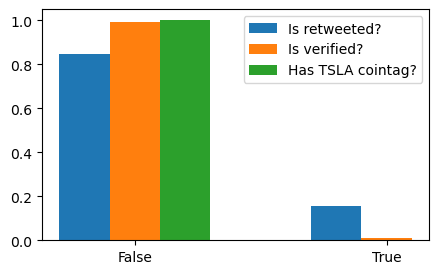

In [93]:
Is_retweeted = final['Is_retweeted'].value_counts(normalize = True)
Is_verified = final['Is_verified'].value_counts(normalize = True)
Has_TSLA = final['Has_$TSLA'].value_counts(normalize = True)

plt.figure(figsize = (5, 3))
labels = ['False', 'True']
plt.bar(Is_retweeted.index-0.2, Is_retweeted.values, width = 0.2, label = 'Is retweeted?')
plt.bar(Is_verified.index, Is_verified.values, width = 0.2, label = 'Is verified?')
plt.bar(Has_TSLA.index+0.2, Has_TSLA.values, width = 0.2, label = 'Has TSLA cointag?')
plt.xticks(Is_retweeted.index, labels)
plt.legend()

### Tweet Impression
Each tweet on Twitter carries a unique social impression that varies depending on its level of engagement. Accounts with a large following or tweets that have been retweeted multiple times and received numerous likes hold more weight on the platform. To ensure accuracy in our final aggregation, we must consider each tweet's impression factor. There are various ways to define this factor, but our approach is as follows:

Impression Factor=log⁡(number of followers + 1)+log⁡(number of likes + 1)+ (0.5 * is_retweeted+ 0.5 * has_cointagTSLA+ is_(account_verified ) )

In [94]:
# Define tweet impression
import math
final_cp = final.copy()
final_cp['impression'] = final_cp['Follower_count'].map(lambda x: math.log10(x+1))+final_cp['Like_count'].map(lambda x: math.log10(x+1))+(0.5*final_cp['Is_retweeted']+0.5*final_cp['Has_$TSLA']+final_cp['Is_verified'])
#Transform datetime object
final_cp['Created_at'] = pd.to_datetime(final_cp['Created_at'])
final_cp['Created_at'] = final_cp['Created_at'].dt.date
final_reduced = final_cp.loc[:,['Created_at','roberta_neg', 'roberta_neu', 'roberta_pos','impression']]

<AxesSubplot:xlabel='impression', ylabel='Count'>

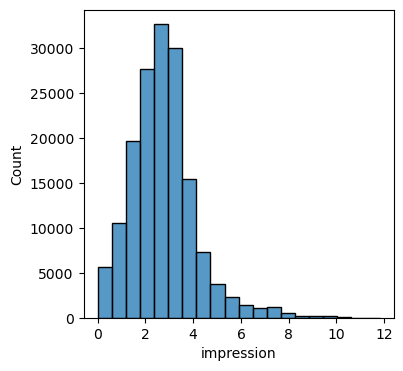

In [95]:
plt.figure(figsize = (4,4))
sns.histplot(final_reduced['impression'], bins = 20)

In [96]:
# Calculate sentiment polarity by considering impression factor for each tweet
final_reduced['w_neg'] = final_reduced['roberta_neg']*final_reduced['impression']
final_reduced['w_neu'] = final_reduced['roberta_neu']*final_reduced['impression']
final_reduced['w_pos'] = final_reduced['roberta_pos']*final_reduced['impression']

final_reduced.drop(columns = ['roberta_neg','roberta_neu', 'roberta_pos'], inplace = True)

In [97]:
# Aggregate tweets and calculate average sentiments on a daily basis
agg = final_reduced.groupby('Created_at').agg({'impression': ['sum','count'], 'w_neg': 'sum', 'w_neu': 'sum', 'w_pos': 'sum'}).reset_index()

agg['agg_neg'] = agg['w_neg']['sum']/agg['impression']['sum']
agg['agg_nue'] = agg['w_neu']['sum']/agg['impression']['sum']
agg['agg_pos'] = agg['w_pos']['sum']/agg['impression']['sum']
agg['number of tweets']=agg['impression']['count']

agg.drop(columns = ['impression', 'w_neg', 'w_neu', 'w_pos'], inplace = True)
agg.to_csv('FinalTweets.csv')

C:\Users\user\anaconda3\envs\deeplearning\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


# Price Data

### Price action analysis
This feature will provide insights into the market trend for a particular day. For example, if the closing price is higher than the opening price, and the difference accounts for 75% of the difference between the high and low prices, then the market behavior for that day can be considered as "bullish." Conversely, if the closing price is lower than the opening price and the difference represents 75% of the high and low differences, then the market is deemed "bearish." If none of these conditions are met, then it is referred to as "consolidation." 

In [98]:
price = pd.read_csv('TSLA.csv')
price['Date'] = pd.to_datetime(price['Date'])
price['Date'] = price['Date'].dt.date

price['high-low'] = price['High']-price['Low']
price['close-open'] = price['Close']-price['Open']

price['price action'] = np.where((price['close-open']<0) & (abs(price['close-open'])>0.75*price['high-low']),'bearish',
                                 np.where((price['close-open']>0) & (price['close-open']>0.75*price['high-low']),'bullish','consolidation'))

price = pd.get_dummies(price, columns = ['price action'])
price = price.loc[:,['Date','Open','Volume', 'price action_bearish', 'price action_bullish']]

# Join tweets and price data

In [114]:
# price = pd.read_csv('TSLA.csv')
# price['Date'] = pd.to_datetime(price['Date'])
# price['Date'] = price['Date'].dt.date
# price = price.loc[:,['Date','Open','Volume']]

result = pd.merge(price, agg, left_on='Date', right_on='Created_at', how = 'inner')
result = result.rename(columns = {('agg_neg', ''):'Negativity', ('agg_nue', ''):'Neutrality', ('agg_pos', ''):'Positivity',('number of tweets', ''):'Number of tweets'})
result.drop(columns = ('Created_at', ''), inplace = True)

result.to_csv('Result.csv')

C:\Users\user\anaconda3\envs\deeplearning\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


# Exploratory Data Analysis (EDA)

In [15]:
# Read data
df2 = pd.read_csv('Result.csv')

# Set 'date' feature as index
df2.index = df2['Date']
df2.drop(columns = ['Unnamed: 0','Date', 'price action_bearish', 'price action_bullish'], inplace = True)
df2.head(5)

,Open,Volume,Negativity,Neutrality,Positivity,Number of tweets
Date,,,,,,
2020-01-02,28.299999,142981500,0.164644,0.655234,0.180122,101
2020-01-03,29.366667,266677500,0.146606,0.638612,0.214782,171
2020-01-06,29.364668,151995000,0.129218,0.667316,0.203466,117
2020-01-07,30.760000,268231500,0.123480,0.676731,0.199789,191
2020-01-08,31.580000,467164500,0.152139,0.625162,0.222700,169


## Pairplot visulization
visualize the pairwise relationships between multiple variables in a dataset

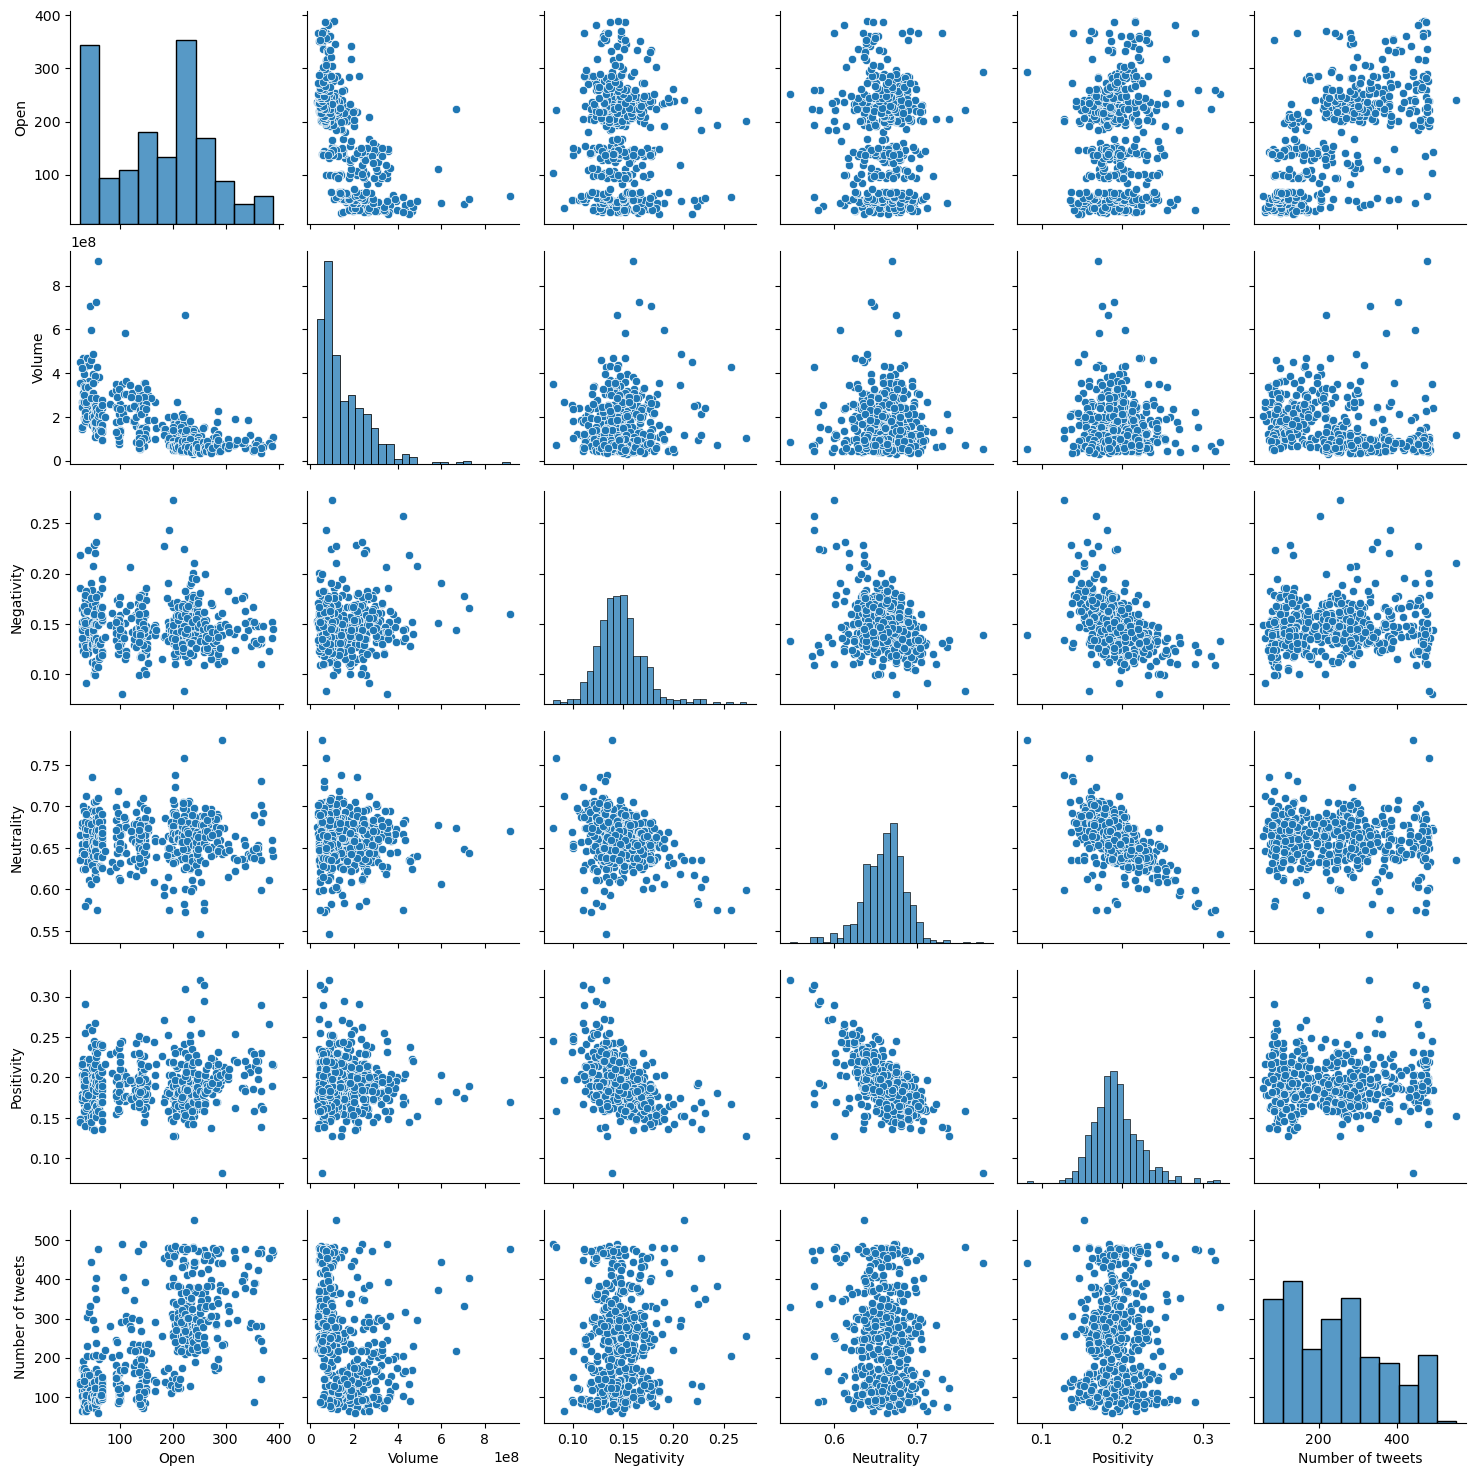

In [11]:
sns.pairplot(df2)

## Correlation Heatmap 
a heatmap, indicating the correlation coefficient between the corresponding pair of variables

<AxesSubplot:>

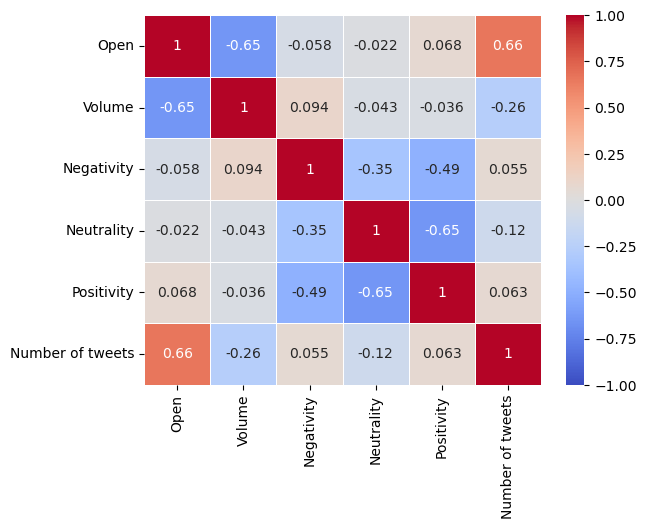

In [50]:
sns.heatmap(df2.corr(), annot= True, vmin = -1, vmax = +1, cmap = 'coolwarm', linewidth = .5 )

## Market Trend Status
A bar chart is used to illustrate the daily trend status of the market, expressed as a percentage.

<BarContainer object of 3 artists>

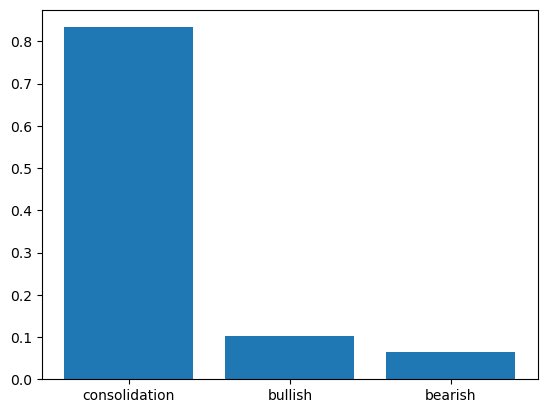

In [12]:
price = pd.read_csv('TSLA.csv')
price['Date'] = pd.to_datetime(price['Date'])
price['Date'] = price['Date'].dt.date

price['high-low'] = price['High']-price['Low']
price['close-open'] = price['Close']-price['Open']

price['price action'] = np.where((price['close-open']<0) & (abs(price['close-open'])>0.75*price['high-low']),'bearish',
                                 np.where((price['close-open']>0) & (price['close-open']>0.75*price['high-low']),'bullish','consolidation'))

mask = price['price action'].value_counts('normalize')
plt.bar(mask.index, mask.values)

## Number of Tweets Moving Average
On a daily basis, the number of tweets with the hashtag #Tesla has been visualized using three moving averages - 5, 20, and 50 - to display the trend over time.

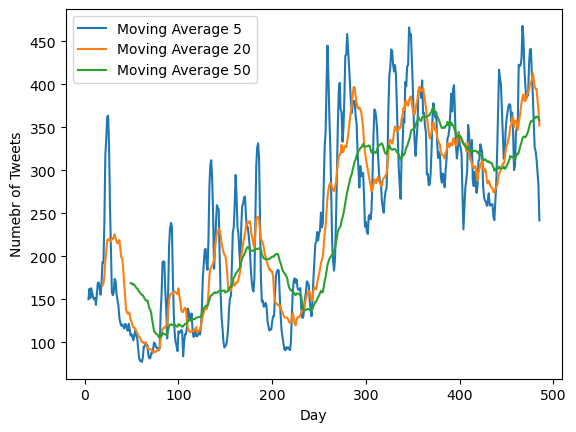

In [17]:
df = pd.read_csv('Result.csv')

rolling_5 = df['Number of tweets'].rolling(window=5).mean()
rolling_20 = df['Number of tweets'].rolling(window=20).mean()
rolling_50 = df['Number of tweets'].rolling(window=50).mean()

plt.figure()
plt.plot(rolling_5, label = 'Moving Average 5')
plt.plot(rolling_20, label = 'Moving Average 20')
plt.plot(rolling_50, label = 'Moving Average 50')
plt.ylabel('Numebr of Tweets')
plt.xlabel('Day')
plt.legend()

# Modeling

In [3]:
# Read data
df2 = pd.read_csv('Result.csv')

# Set 'date' feature as index
df2.index = df2['Date']
df2.drop(columns = ['Unnamed: 0','Date'], inplace = True)

### Feature Scaling
The MinMaxScaler is a data preprocessing technique used to rescale the values of a dataset to a specific range. This technique involves scaling the original data to a new range, typically between 0 and 1, where the minimum value of the data is transformed to 0, and the maximum value is transformed to 1.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
arr = scalar.fit_transform(df2)

df3 = pd.DataFrame(data = arr, index = df2.index , columns = df2.columns)
df3.head(5)

,Open,Volume,price action_bearish,price action_bullish,Negativity,Neutrality,Positivity,Number of tweets
Date,,,,,,,,
2020-01-02,0.009116,0.128385,0.0,0.0,0.438364,0.465293,0.412475,0.085193
2020-01-03,0.012045,0.268205,0.0,0.0,0.344556,0.393974,0.557494,0.227181
2020-01-06,0.012040,0.138573,0.0,1.0,0.254132,0.517132,0.510149,0.117647
2020-01-07,0.015871,0.269962,0.0,0.0,0.224291,0.557530,0.494765,0.267748
2020-01-08,0.018122,0.494826,0.0,0.0,0.373330,0.336260,0.590623,0.223124


### Reshape data
In order to train an LSTM model on sequential data, such as time series data, the input data needs to be reshaped into a specific format that can be fed into the model.

In [5]:
def df_reshape(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

X, y_ = df_reshape(df3)
X_, y = df_reshape(df2)

### Split data into train, validation and test set

In [6]:
X_train, y_train = X[:360], y[:360]
# X_test, y_test = X[390:], y[390:]
# X_train, y_train = X[:390], y[:390]
X_val, y_val = X[360:405], y[360:405]
X_test, y_test = X[405:450], y[405:450]

### Model architecture and hyperparameter tuning
The data model architecture consists of two LSTM layers with dropout regularization, followed by two dense layers. The best model is proposed based on hyperparameter optimization.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import KFold

# Define your model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('LSTMunits1', min_value=32, max_value=512, step=32),
                          input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences =True))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('LSTMunits2', min_value=32, max_value=512, step=32)))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense', min_value=2, max_value=8, step=2), activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mse', metrics=['mae'])
    return model

# Define the hyperparameter search space
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='lstm_model_hyperparameters',
    project_name='stock_price_prediction')


# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_indices, valid_indices in kfold.split(X_train):
    X_train_cv, X_valid_cv = X_train[train_indices], X_train[valid_indices]
    y_train_cv, y_valid_cv = y_train[train_indices], y_train[valid_indices]
    tuner.search(X_train_cv, y_train_cv, epochs=100, validation_data=(X_valid_cv, y_valid_cv))


# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

Trial 20 Complete [00h 01m 05s]
val_loss: 133.40225982666016

Best val_loss So Far: 96.65150451660156
Total elapsed time: 00h 32m 12s
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
Best hyperparameters: {'LSTMunits1': 320, 'dropout1': 0.2, 'LSTMunits2': 384, 'dropout2': 0.1, 'dense': 4, 'learning_rate': 0.0008825714954772356}


### Build and fit model

In [ ]:
# Build the model with the best hyperparameters
model = build_model(best_hps)

# Train the model on the entire training dataset using the best hyperparameters
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose = 0)

#Save model
best_model.save('lstm_model.h5')

### Train loss VS. Validation loss

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('lstm_model.h5')

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count[10:], training_loss[10:], label = 'Training')
plt.plot(epoch_count[10:], validation_loss[10:], label = 'Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

### Model Prediction

In [12]:
# TRAIN
train_prediction = model.predict(X_train).flatten()
train_result = pd.DataFrame(data = {'Train Predictions':train_prediction, 'Actuals':y_train})
train_result.head(5)

,Train Predictions,Actuals
0,41.386852,33.139999
1,42.293301,32.119331
2,40.768906,32.900002
3,42.033581,36.284000
4,42.329128,35.317333


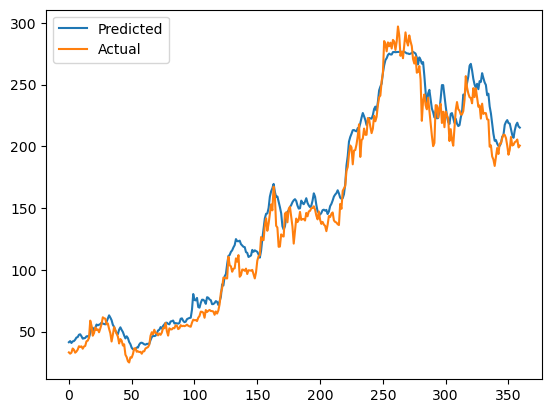

In [13]:
plt.plot(train_result['Train Predictions'], label = 'Predicted')
plt.plot(train_result['Actuals'], label = 'Actual')
plt.legend()

In [16]:
# VALIDATION
val_prediction = model.predict(X_val).flatten()
val_result = pd.DataFrame(data = {'val Predictions':val_prediction, 'Actuals':y_val})
val_result.head(5)

,val Predictions,Actuals
0,214.090195,204.456665
1,211.704529,208.160004
2,212.390060,206.083328
3,218.800293,210.666672
4,222.520462,224.996674


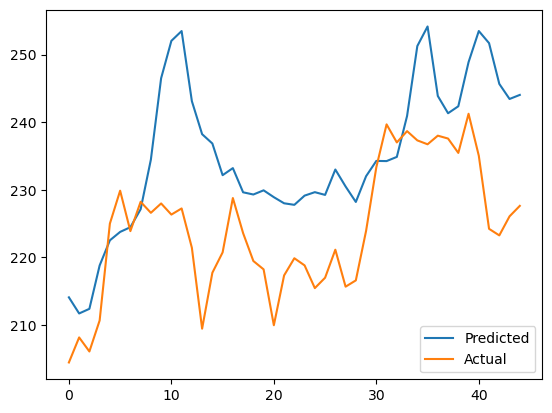

In [17]:
plt.plot(val_result['val Predictions'], label = 'Predicted')
plt.plot(val_result['Actuals'], label = 'Actual')
plt.legend()

In [18]:
# TEST
test_prediction = model.predict(X_test).flatten()
test_result = pd.DataFrame(data = {'test Predictions':test_prediction, 'Actuals':y_test})
test_result.head(5)

,test Predictions,Actuals
0,239.961411,228.479996
1,236.203934,235.676666
2,236.210785,236.103333
3,239.074432,235.000000
4,243.050613,238.240005


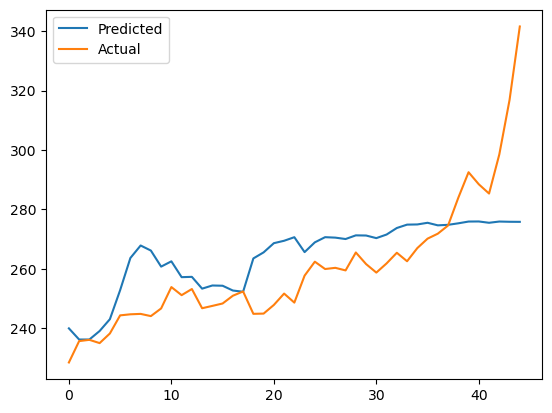

In [19]:
plt.plot(test_result['test Predictions'], label = 'Predicted')
plt.plot(test_result['Actuals'], label = 'Actual')
plt.legend()

### All in one chart

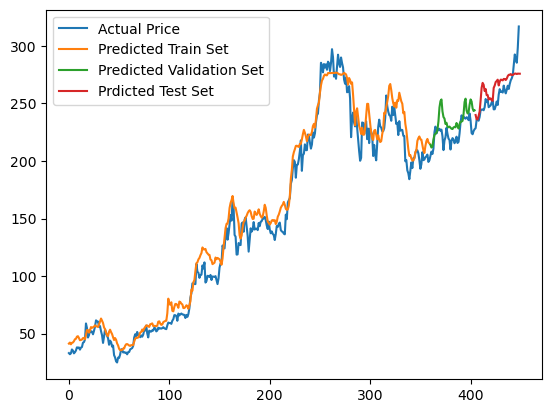

In [24]:
plt.figure()
plt.plot(y[:449], label = 'Actual Price')
plt.plot(train_prediction, label = 'Predicted Train Set')
plt.plot([i for i in range(360,405)],val_prediction, label = 'Predicted Validation Set')
plt.plot([j for j in range(405,450)],test_prediction, label = 'Prdicted Test Set')
plt.legend()